# Parametric LCA template — CPU packaging (PEF 3.0)

This notebook contains a parametric model for CPU packaging LCA covering the 16 PEF impact categories. Edit the input cell and re-run the computation cells.

In [1]:

# Imports and impact categories
import pandas as pd, numpy as np, matplotlib.pyplot as plt
impact_cats = [
    "Climate change","Ozone depletion","Human toxicity (cancer)","Human toxicity (non-cancer)",
    "Ionizing radiation (human health)","Particulate emissions","Photochemical ozone formation (human health)",
    "Acidification","Eutrophication (on land)","Eutrophication (freshwater)","Eutrophication (marine)",
    "Ecotoxicity (freshwater)","Land use","Water use","Resource use (minerals and metals)","Resource use (fossil)"
]
print('Loaded PEF impact categories.')
pd.DataFrame({'PEF_3.0_categories': impact_cats})


Loaded PEF impact categories.


,PEF_3.0_categories
0,Climate change
1,Ozone depletion
2,Human toxicity (cancer)
3,Human toxicity (non-cancer)
4,Ionizing radiation (human health)
5,Particulate emissions
6,Photochemical ozone formation (human health)
7,Acidification
8,Eutrophication (on land)
9,Eutrophication (freshwater)


In [2]:

# Default material emission factors (illustrative) per kg material for each PEF category
materials = {
    'copper':      [4.0,1e-6,0.02,0.05,0.01,0.2,0.12,0.03,0.001,0.0005,0.0006,0.4,0.1,0.02,50.0,45.0],
    'gold':        [20.0,1e-5,0.1,0.2,0.02,0.1,0.05,0.01,0.0001,0.00005,0.00006,0.5,0.05,0.001,2000.0,10.0],
    'aluminum':    [8.0,5e-7,0.01,0.02,0.005,0.1,0.04,0.02,0.0008,0.0004,0.0005,0.2,0.3,0.01,30.0,40.0],
    'epoxy':       [2.5,2e-7,0.005,0.01,0.002,0.05,0.02,0.015,0.0006,0.0003,0.00035,0.1,0.5,0.5,2.0,20.0],
    'FR4':         [3.0,3e-7,0.006,0.012,0.0025,0.06,0.03,0.02,0.0007,0.00035,0.0004,0.12,0.6,0.6,5.0,25.0],
    'ceramic':     [6.0,1e-7,0.004,0.009,0.001,0.03,0.02,0.01,0.0004,0.0002,0.00025,0.05,1.0,0.2,10.0,15.0],
    'solder':      [5.0,5e-7,0.01,0.02,0.003,0.05,0.02,0.02,0.0007,0.00035,0.0004,0.1,0.1,0.02,20.0,30.0],
    'nickel':      [7.0,6e-7,0.02,0.03,0.005,0.05,0.03,0.02,0.0006,0.0003,0.00032,0.15,0.2,0.01,25.0,28.0]
}
mat_df = pd.DataFrame(materials, index=impact_cats).T
mat_df.index.name = 'material'
mat_df.head()


,Climate change,Ozone depletion,Human toxicity (cancer),Human toxicity (non-cancer),Ionizing radiation (human health),Particulate emissions,Photochemical ozone formation (human health),Acidification,Eutrophication (on land),Eutrophication (freshwater),Eutrophication (marine),Ecotoxicity (freshwater),Land use,Water use,Resource use (minerals and metals),Resource use (fossil)
material,,,,,,,,,,,,,,,,
copper,4.0,1.000000e-06,0.020,0.050,0.0100,0.20,0.12,0.030,0.0010,0.00050,0.00060,0.40,0.10,0.020,50.0,45.0
gold,20.0,1.000000e-05,0.100,0.200,0.0200,0.10,0.05,0.010,0.0001,0.00005,0.00006,0.50,0.05,0.001,2000.0,10.0
aluminum,8.0,5.000000e-07,0.010,0.020,0.0050,0.10,0.04,0.020,0.0008,0.00040,0.00050,0.20,0.30,0.010,30.0,40.0
epoxy,2.5,2.000000e-07,0.005,0.010,0.0020,0.05,0.02,0.015,0.0006,0.00030,0.00035,0.10,0.50,0.500,2.0,20.0
FR4,3.0,3.000000e-07,0.006,0.012,0.0025,0.06,0.03,0.020,0.0007,0.00035,0.00040,0.12,0.60,0.600,5.0,25.0


In [3]:

# Process emission factors per kWh (illustrative)
ef_per_kwh = [0.4,1e-7,0.002,0.004,0.0005,0.02,0.01,0.003,0.0002,0.0001,0.00012,0.02,0.001,0.05,0.01,0.3]
ef_kwh = pd.Series(ef_per_kwh, index=impact_cats, name='per_kWh')
ef_kwh


Climate change                                  4.000000e-01
Ozone depletion                                 1.000000e-07
Human toxicity (cancer)                         2.000000e-03
Human toxicity (non-cancer)                     4.000000e-03
Ionizing radiation (human health)               5.000000e-04
Particulate emissions                           2.000000e-02
Photochemical ozone formation (human health)    1.000000e-02
Acidification                                   3.000000e-03
Eutrophication (on land)                        2.000000e-04
Eutrophication (freshwater)                     1.000000e-04
Eutrophication (marine)                         1.200000e-04
Ecotoxicity (freshwater)                        2.000000e-02
Land use                                        1.000000e-03
Water use                                       5.000000e-02
Resource use (minerals and metals)              1.000000e-02
Resource use (fossil)                           3.000000e-01
Name: per_kWh, dtype: fl

In [4]:

# Input parameters (defaults)
params = {
 'pkg_area_mm2': 400.0,
 'pkg_thickness_mm': 1.5,
 'copper_thickness_um': 35.0,
 'copper_area_fraction': 0.6,
 'num_copper_layers': 2,
 'mass_copper_g': None,
 'mass_gold_mg': 10.0,
 'mass_epoxy_g': 0.8,
 'mass_fr4_g': 1.2,
 'mass_solder_g': 0.12,
 'mass_aluminum_g': 0.0,
 'mass_ceramic_g': 0.0,
 'energy_kwh_per_pkg': 0.1,
 'yield': 0.98,
 'chemicals_g_per_pkg': 2.0,
 'recycling_rate_cu': 0.9,
 'recycling_rate_gold': 0.95,
 'disposal_fraction_landfill': 0.1
}
pd.Series(params)


pkg_area_mm2                  400.00
pkg_thickness_mm                1.50
copper_thickness_um            35.00
copper_area_fraction            0.60
num_copper_layers               2.00
mass_copper_g                    NaN
mass_gold_mg                   10.00
mass_epoxy_g                    0.80
mass_fr4_g                      1.20
mass_solder_g                   0.12
mass_aluminum_g                 0.00
mass_ceramic_g                  0.00
energy_kwh_per_pkg              0.10
yield                           0.98
chemicals_g_per_pkg             2.00
recycling_rate_cu               0.90
recycling_rate_gold             0.95
disposal_fraction_landfill      0.10
dtype: float64

In [5]:

# Helper functions and computation
rho_cu = 8.96  # g/cm3
def copper_mass_from_geometry(area_mm2, thickness_um, area_fraction, n_layers):
    area_cm2 = area_mm2 / 100.0
    thickness_cm = thickness_um / 1e4
    cu_volume_cm3 = area_cm2 * area_fraction * thickness_cm * n_layers
    mass_g = cu_volume_cm3 * rho_cu
    return mass_g

def compute_impacts(params, mat_df, ef_kwh):
    if params['mass_copper_g'] is None:
        mass_cu = copper_mass_from_geometry(params['pkg_area_mm2'],
                                            params['copper_thickness_um'],
                                            params['copper_area_fraction'],
                                            params['num_copper_layers'])
    else:
        mass_cu = params['mass_copper_g']
    mass_au_g = params['mass_gold_mg'] / 1000.0
    mass_epoxy = params['mass_epoxy_g']
    mass_fr4 = params['mass_fr4_g']
    mass_solder = params['mass_solder_g']
    mass_al = params['mass_aluminum_g']
    mass_cer = params['mass_ceramic_g']
    mass_dict = {'copper': mass_cu,'gold': mass_au_g,'epoxy': mass_epoxy,'FR4': mass_fr4,'solder': mass_solder,'aluminum': mass_al,'ceramic': mass_cer}
    impacts_material = pd.Series(0.0, index=impact_cats)
    for mat, mass in mass_dict.items():
        if mat in mat_df.index and mass>0:
            impacts_material += (mass/1000.0) * mat_df.loc[mat]
    energy_kwh = params['energy_kwh_per_pkg'] / params['yield']
    impacts_process = energy_kwh * ef_kwh
    chem_mass_kg = params['chemicals_g_per_pkg'] / 1000.0
    chem_effect = chem_mass_kg * mat_df.loc['epoxy']
    impacts_total = impacts_material + impacts_process + chem_effect
    total_mass_g = sum([v for v in mass_dict.values()])
    return {'mass_dict_g': mass_dict,'impacts_material': impacts_material,'impacts_process': impacts_process,'impacts_chemicals': chem_effect,'impacts_total': impacts_total,'total_mass_g': total_mass_g,'energy_kwh_effective': energy_kwh}

# Compute baseline
baseline = compute_impacts(params, mat_df, ef_kwh)
impacts_df = pd.DataFrame({'material': baseline['impacts_material'],'process': baseline['impacts_process'],'chemicals': baseline['impacts_chemicals'],'total': baseline['impacts_total']})
impacts_df


,material,process,chemicals,total
Climate change,7.002112e-03,4.081633e-02,5.000000e-03,5.281844e-02
Ozone depletion,8.305280e-10,1.020408e-08,4.000000e-10,1.143461e-08
Human toxicity (cancer),1.641056e-05,2.040816e-04,1.000000e-05,2.304922e-04
Human toxicity (non-cancer),3.432640e-05,4.081633e-04,2.000000e-05,4.624897e-04
Ionizing radiation (human health),6.665280e-06,5.102041e-05,4.000000e-06,6.168569e-05
Particulate emissions,1.491056e-04,2.040816e-03,1.000000e-04,2.289922e-03
Photochemical ozone formation (human health),7.296336e-05,1.020408e-03,4.000000e-05,1.133372e-03
Acidification,4.301584e-05,3.061224e-04,3.000000e-05,3.791383e-04
Eutrophication (on land),1.555528e-06,2.040816e-05,1.200000e-06,2.316369e-05
Eutrophication (freshwater),7.777640e-07,1.020408e-05,6.000000e-07,1.158185e-05


In [6]:

# Mass breakdown and summary numbers
mass_df = pd.Series(baseline['mass_dict_g']).rename('mass_g')
summary = pd.DataFrame({'mass_g': mass_df,'mass_pct_of_pkg': (mass_df / baseline['total_mass_g']) * 100.0})
print('Total packaging mass (g):', baseline['total_mass_g'])
summary


Total packaging mass (g): 2.280528


,mass_g,mass_pct_of_pkg
copper,0.150528,6.600577
gold,0.010000,0.438495
epoxy,0.800000,35.079596
FR4,1.200000,52.619393
solder,0.120000,5.261939
aluminum,0.000000,0.000000
ceramic,0.000000,0.000000


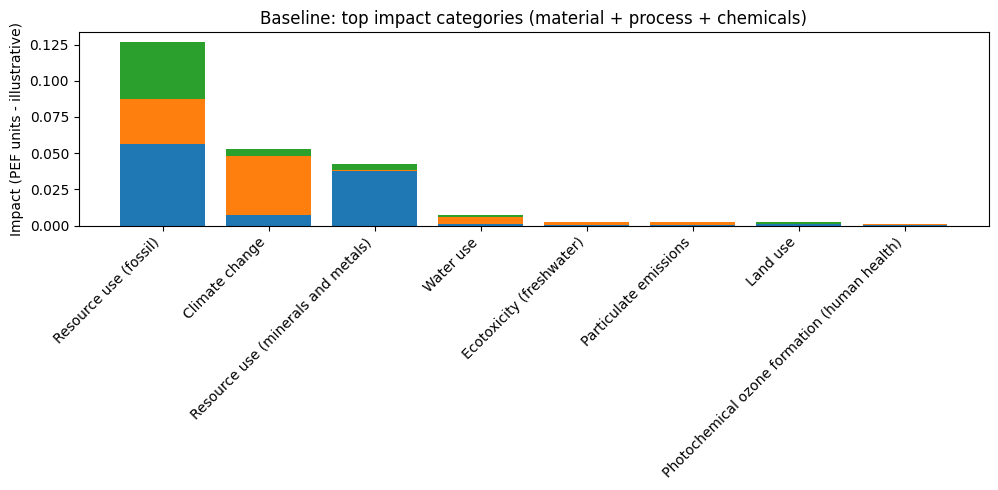

In [7]:

# Plotting baseline top categories (stacked bars)
import numpy as np
cats = impacts_df.index.tolist()
mat_vals = impacts_df['material'].values
proc_vals = impacts_df['process'].values
chem_vals = impacts_df['chemicals'].values
tot_vals = impacts_df['total'].values
top_n = 8
top_idx = np.argsort(tot_vals)[-top_n:][::-1]
top_cats = [cats[i] for i in top_idx]
mat_top = mat_vals[top_idx]
proc_top = proc_vals[top_idx]
chem_top = chem_vals[top_idx]
x = np.arange(len(top_cats))
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x, mat_top)
ax.bar(x, proc_top, bottom=mat_top)
ax.bar(x, chem_top, bottom=mat_top+proc_top)
ax.set_xticks(x)
ax.set_xticklabels(top_cats, rotation=45, ha='right')
ax.set_ylabel('Impact (PEF units - illustrative)')
ax.set_title('Baseline: top impact categories (material + process + chemicals)')
plt.tight_layout()
plt.show()


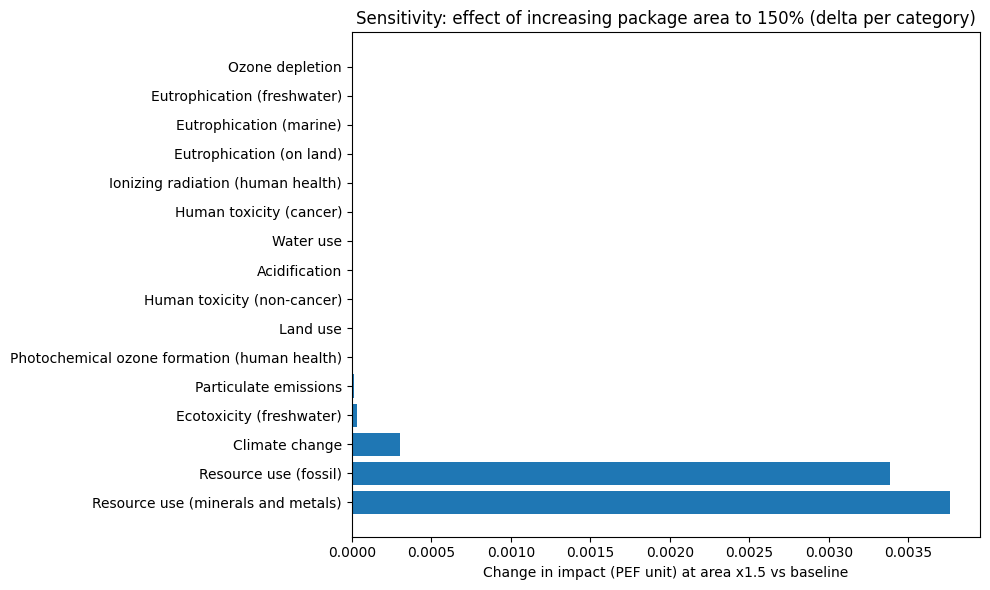

In [8]:

# Sensitivity analysis (vary area and copper thickness)
def run_sensitivity(params, var_name, factors):
    results = []
    for f in factors:
        p = params.copy()
        p[var_name] = params[var_name] * f
        res = compute_impacts(p, mat_df, ef_kwh)
        results.append((f, res['impacts_total']))
    df = pd.DataFrame({str(f): r for f,r in results}, index=impact_cats)
    return df

factors = [0.5,0.8,1.0,1.2,1.5]
sens_area = run_sensitivity(params, 'pkg_area_mm2', factors)
sens_cu_thick = run_sensitivity(params, 'copper_thickness_um', factors)
delta_area = sens_area.subtract(impacts_df['total'], axis=0)
abs_delta = delta_area['1.5'].abs()
sorted_idx = np.argsort(abs_delta.values)[::-1]
sorted_cats = [impact_cats[i] for i in sorted_idx]
sorted_vals = delta_area['1.5'].values[sorted_idx]
fig, ax = plt.subplots(figsize=(10,6))
ypos = np.arange(len(sorted_cats))
ax.barh(ypos, sorted_vals)
ax.set_yticks(ypos)
ax.set_yticklabels(sorted_cats)
ax.set_xlabel('Change in impact (PEF unit) at area x1.5 vs baseline')
ax.set_title('Sensitivity: effect of increasing package area to 150% (delta per category)')
plt.tight_layout()
plt.show()


In [11]:

# Save outputs for export
impacts_df.to_csv('/mnt/data/CPU_packaging_impacts_baseline.csv')
summary.to_csv('/mnt/data/CPU_packaging_mass_summary.csv')
print('Saved CSV outputs to /mnt/data/') 


OSError: Cannot save file into a non-existent directory: '\mnt\data'